In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import torch
from torchvision import transforms

load_dotenv()

sys.path.append(os.path.abspath(os.path.join("../..")))
from src.datasets.kaggledataset import KaggleDataset  # noqa: E402

https://www.kaggle.com/datasets/akashguna/large-captcha-dataset

# Label Analysis

In [2]:
raw_dataset = KaggleDataset(
    os.environ["KAGGLE_ROOT_DIR"],
    transform=None,
    preload=False
)

In [3]:
print(f"Number of Images: {len(raw_dataset):,}")

Number of Images: 113,062


In [7]:
labels = raw_dataset.labels

In [8]:
label_lengths = []
for label in labels:
    label_lengths.append(len(label) == 5)

all(label_lengths)

True

$\Rightarrow$ All the labels have a length of exactly 5

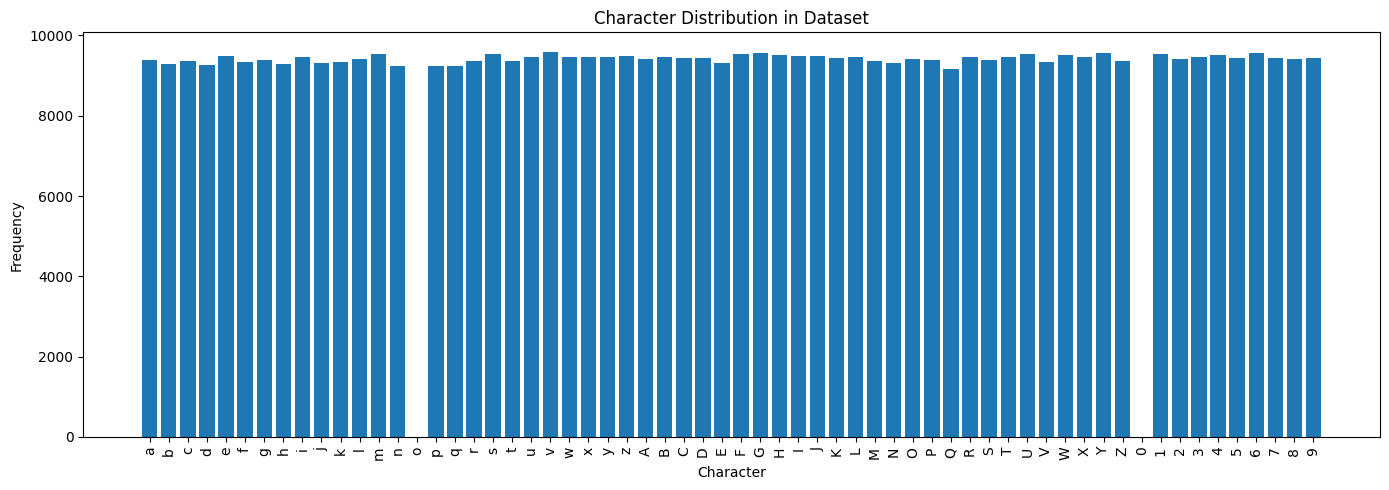

In [9]:
counts = torch.bincount(torch.cat(labels))[1:]
chars = [raw_dataset.idx_to_char[i] for i in range(1, len(counts) + 1)]

plt.figure(figsize=(14, 5))
plt.bar(chars, counts.numpy())
plt.xlabel("Character")
plt.ylabel("Frequency")
plt.title("Character Distribution in Dataset")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

$\Rightarrow$ Weird that there is not a single "o" or "0" in the dataset

# Original Images

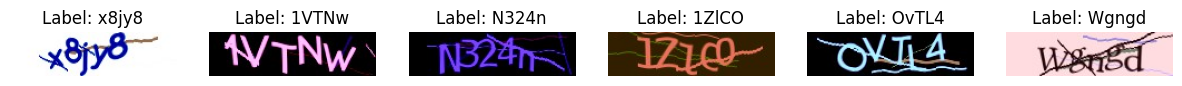

In [10]:
def visualize_samples(dataset, num_samples=6):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        img, label_tensor = dataset[i]
        label_str = "".join(dataset.idx_to_char[idx.item()] for idx in label_tensor)

        img = np.array(img)
        axes[i].imshow(img)

        axes[i].set_title(f"Label: {label_str}")
        axes[i].axis("off")

    plt.show()


visualize_samples(raw_dataset)

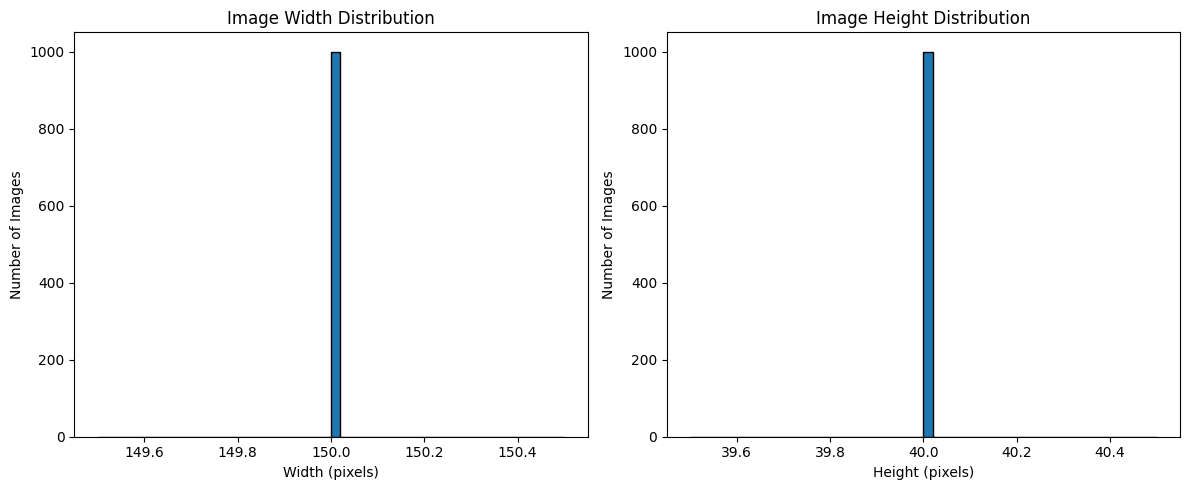

In [14]:
def collect_image_sizes(dataset, sample_size=1000):
    widths = []
    heights = []

    for i in range(len(dataset)):
        img, _ = dataset[i]

        # Convert to numpy if needed
        if not isinstance(img, np.ndarray):
            img = np.array(img)

        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)

        if i == sample_size:
            break

    return widths, heights

widths, heights = collect_image_sizes(raw_dataset)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Width histogram
axes[0].hist(widths, bins=50, edgecolor="black")
axes[0].set_title("Image Width Distribution")
axes[0].set_xlabel("Width (pixels)")
axes[0].set_ylabel("Number of Images")

# Height histogram
axes[1].hist(heights, bins=50, edgecolor="black")
axes[1].set_title("Image Height Distribution")
axes[1].set_xlabel("Height (pixels)")
axes[1].set_ylabel("Number of Images")

plt.tight_layout()
plt.show()

$\Rightarrow$ All the images seem to have the same dimensions (40 x 150)

# Preprocessed Images

In [27]:
gray_transformation = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.RandomInvert(p=0.5),
        transforms.ToTensor(),
    ]
)
gray_dataset = KaggleDataset(os.environ["KAGGLE_ROOT_DIR"], transform=gray_transformation, preload=False)

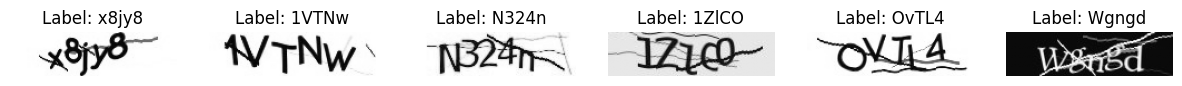

In [31]:
def visualize_samples_gray(dataset, num_samples=6):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        img, label_tensor = dataset[i]
        label_str = "".join([dataset.idx_to_char[idx.item()] for idx in label_tensor])

        if torch.is_tensor(img):
            img = img.squeeze()

        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Label: {label_str}")
        axes[i].axis("off")
    plt.show()


visualize_samples_gray(gray_dataset)

In [1]:
# TODO: Find Data with wrong labels (e.g. G instead of g)